In [2]:
import tensorflow as tf

#### Multiplying Two Variables

In [3]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

result = tf.multiply(x1,x2)
print(result)#donesn't provide with actual multiplication because we haven't created a session

Tensor("Mul:0", shape=(4,), dtype=int32)


#### Creating Session

In [4]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

result = tf.multiply(x1,x2)
sess = tf.Session()
print(sess.run(result))
sess.close()

[ 5 12 21 32]


In [5]:
x = tf.Variable(0)#variable declaration #Global
model = tf.global_variables_initializer()
#if any variable declared in Session it can not be accessed
with tf.Session() as session:#until anything stays inside it, it can be printed
    #i = tf.Variable(0)#local variable
    session.run(model)
    for i in range(5):
        x = x+i
        print(session.run(x))
#print(session.run(x))#as it is out of scope of Session

0
1
3
6
10


In [6]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [7]:
#import tensorflow as tf
import pandas as pd

In [8]:
COLUMN_NAMES = ['SepalLength',
                'SepalWidth',
                'PetalLength',
                'PetalWidth',
                'Species'
               ]

In [9]:
training_dataset = pd.read_csv('iris.csv',names = COLUMN_NAMES,header = 0)
train_x = training_dataset.iloc[:,0:4]
train_y = training_dataset.iloc[:,4]

In [10]:
print(train_x.head())
train_y.head()

   SepalLength  SepalWidth  PetalLength  PetalWidth
0          4.9         3.0          1.4         0.2
1          4.7         3.2          1.3         0.2
2          4.6         3.1          1.5         0.2
3          5.0         3.6          1.4         0.2
4          5.4         3.9          1.7         0.4


0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [11]:
test_dataset = pd.read_csv('iris_test.csv',names = COLUMN_NAMES,header = 0)
test_x = training_dataset.iloc[:,0:4]
test_y = training_dataset.iloc[:,4]

In [12]:
columns_feat = [tf.feature_column.numeric_column(key = 'SepalLength'),
                tf.feature_column.numeric_column(key = 'SepalWidth'),
                tf.feature_column.numeric_column(key = 'PetalLength'),
                tf.feature_column.numeric_column(key = 'PetalWidth')
               ]


In [13]:
#Define Train function
def train_function(inputs, outputs, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((dict(inputs),outputs))
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)
    return dataset.make_one_shot_iterator().get_next()

In [14]:
# Build Neural Network - Classifier
classifier = tf.estimator.DNNClassifier(
    feature_columns=columns_feat,
    # Two hidden layers of 10 nodes each.
    hidden_units=[10, 10],
    # The model is classifying 3 classes
    n_classes=3)
# Train the Model.
classifier.train(input_fn=lambda:train_function(train_x, train_y, 100),    steps=100)

W0703 22:56:09.357892  7056 estimator.py:1811] Using temporary folder as model directory: C:\Users\vaibhav\AppData\Local\Temp\tmpre9jtpfi
W0703 22:56:09.365881  7056 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0703 22:56:09.385856  7056 deprecation.py:323] From <ipython-input-13-2072278e325d>:5: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_o

In [15]:
#Define Evaluation Function
def evaluation_function(attributes, classes, batch_size):
    attributes = dict(attributes)
    if classes is None:
        inputs = attributes
    else:
        inputs = (attributes, classes)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    assert batch_size is not None,"batch_size must not be None"
    dataset = dataset.batch(batch_size)
    return dataset.make_one_shot_iterator().get_next()

In [16]:
#Evaluate the model
eval_result = classifier.evaluate(input_fn=lambda:evaluation_function(test_x, test_y, 100))
print(eval_result)

W0703 22:56:11.875328  7056 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


{'accuracy': 0.96644294, 'average_loss': 0.15733714, 'loss': 11.721617, 'global_step': 100}


# SeaBorn MATPLOTLIB


Object `seaborn` not found.


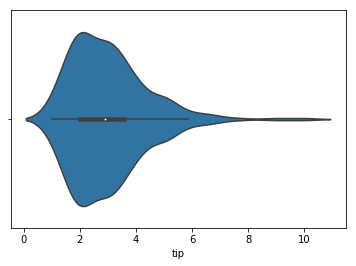

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
seaborn?
tips = sns.load_dataset('tips')
sns.violinplot(x = 'tip', data = tips)
plt.show()

In [19]:
seaborn?
import numpy as np
np?

Object `seaborn` not found.
